In [1]:
import random
import torch
from d2l import torch as d2l

#### 构造数据集
根据有噪声的线性模型构造一个人造数据集。使用线性模型参数w=[2,-3.4]T、b=4.2和噪声项c生成数据集及其标签：
y=Xw+b+c

In [2]:
def synthetic_data(w,b,num_examples):
    X=torch.normal(0,1,(num_examples,len(w))) # 生成均值为0，方差为1的随机数，n个样本，列数是w的长度
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)     # 加入一个随机噪音
    return X,y.reshape((-1,1))
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)


#### features中的每一行都包含一个二维数据样本，label每一行都含一维标签纸（一个标量）


In [3]:
features[0],labels[0]

(tensor([0.7355, 0.6886]), tensor([3.3370]))

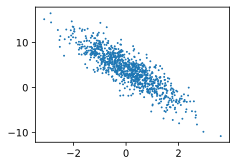

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1);

#### 定义一个data_iter函数，该函数接受批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量

In [7]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    # 生成每个样本的下标
    indices = list(range(num_examples))
    # 这些样本是随机抽取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size): # 每次[0,num_examples],每次跳batch_size个大小
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-0.8311,  0.3003],
        [-0.0132, -0.8637],
        [-1.9336, -0.1158],
        [ 0.8082,  0.3916],
        [-0.1963, -1.5764],
        [-0.8145, -0.7917],
        [ 0.1658, -1.3277],
        [-1.7360, -0.5216],
        [ 2.5427,  0.4828],
        [ 0.2859, -2.8564]]) 
 tensor([[ 1.5248],
        [ 7.0942],
        [ 0.7166],
        [ 4.4898],
        [ 9.1536],
        [ 5.2633],
        [ 9.0578],
        [ 2.5025],
        [ 7.6313],
        [14.4775]])


#### 定义 初始化模型参数

In [8]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

#### 定义模型

In [9]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b  # 矩阵x向量+偏差  

#### 定义损失函数

In [10]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2/2

#### 定义优化算法

In [12]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:   # 更新时候，不需要加入梯度计算
            param -= lr*param.grad/batch_size
            param.grad.zero_()

#### 训练过程


In [13]:
lr = 0.03  # 学习率
num_epochs = 3 # 整个数据扫三遍
net = linreg
loss = squared_loss

for epoch in range(num_epochs):              # 每一次对数据扫一遍
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)               # X和y的小批量损失
        # 因为l形状是批量大小的向量
        # 求和之后计算梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size)             # 使用参数的梯度更新参数
        with torch.no_grad():
            train_l = loss(net(features,w,b),labels)
            print(f'epoch {epoch+1},loss{float(train_l.mean()):f}')
    


epoch 1,loss13.366604
epoch 1,loss12.707590
epoch 1,loss11.910878
epoch 1,loss10.672441
epoch 1,loss9.721087
epoch 1,loss9.112851
epoch 1,loss8.758143
epoch 1,loss8.320837
epoch 1,loss7.934376
epoch 1,loss7.592867
epoch 1,loss6.967983
epoch 1,loss6.656844
epoch 1,loss6.366518
epoch 1,loss5.851671
epoch 1,loss5.598140
epoch 1,loss5.303737
epoch 1,loss5.017625
epoch 1,loss4.853936
epoch 1,loss4.729239
epoch 1,loss4.577073
epoch 1,loss4.366355
epoch 1,loss4.164474
epoch 1,loss3.906973
epoch 1,loss3.790585
epoch 1,loss3.525737
epoch 1,loss3.247612
epoch 1,loss3.010244
epoch 1,loss2.796283
epoch 1,loss2.645617
epoch 1,loss2.470200
epoch 1,loss2.384008
epoch 1,loss2.290452
epoch 1,loss2.157037
epoch 1,loss2.064353
epoch 1,loss1.880002
epoch 1,loss1.798146
epoch 1,loss1.680276
epoch 1,loss1.608894
epoch 1,loss1.498942
epoch 1,loss1.381091
epoch 1,loss1.329083
epoch 1,loss1.297805
epoch 1,loss1.254373
epoch 1,loss1.196311
epoch 1,loss1.014221
epoch 1,loss0.990726
epoch 1,loss0.864879
epoch 1,l

#### 比较真实参数和通过训练学到参数来评估训练的成功程度

In [14]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0004, -0.0010], grad_fn=<SubBackward0>)
b的估计误差: tensor([-6.6280e-05], grad_fn=<RsubBackward1>)
